In [195]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import scipy.stats
import plotly.express as px
import plotly.figure_factory as ff
%matplotlib inline

In [190]:
# df = pd.read_csv ('dataset.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed:0              614 non-null    int64  
 1   url                    614 non-null    object 
 2   title                  614 non-null    object 
 3   author                 614 non-null    object 
 4   num_reviews            614 non-null    int64  
 5   num_ratings            614 non-null    int64  
 6   avg_rating             614 non-null    float64
 7   num_pages              614 non-null    int64  
 8   original_publish_year  614 non-null    int64  
 9   series                 614 non-null    bool   
 10  genres                 614 non-null    object 
 11  awards                 614 non-null    object 
 12  places                 314 non-null    object 
 13  awards_count           614 non-null    int64  
 14  new_rating             614 non-null    float64
 15  minmax

In [289]:
df.describe()

,Unnamed:0,num_reviews,num_ratings,avg_rating,num_pages,original_publish_year,awards_count,new_rating,minmax_norm_rating,avg_rating_mean_norm,awards_numeric
count,614.000000,614.000000,6.140000e+02,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,306.500000,10785.221498,3.882001e+05,4.067899,397.662866,1970.258958,2.802932,5.612710,5.612710,5.500000,2.802932
std,177.390811,15953.357287,7.837616e+05,0.190449,258.373837,22.530958,2.966137,1.664117,1.664117,0.832058,2.966137
min,0.000000,165.000000,2.815000e+03,3.540000,26.000000,1901.000000,1.000000,1.000000,1.000000,3.193645,1.000000
25%,153.250000,2130.500000,4.447750e+04,3.940000,225.000000,1955.000000,1.000000,4.495146,4.495146,4.941218,1.000000
50%,306.500000,4883.500000,1.203915e+05,4.080000,331.000000,1975.000000,2.000000,5.718447,5.718447,5.552868,2.000000
75%,459.750000,12211.000000,3.542418e+05,4.197500,482.750000,1989.000000,4.000000,6.745146,6.745146,6.066218,4.000000
max,613.000000,119110.000000,7.511380e+06,4.570000,1796.000000,2003.000000,27.000000,10.000000,10.000000,7.693645,27.000000


In [275]:
df.head()

,Unnamed:0,url,title,author,num_reviews,num_ratings,avg_rating,num_pages,original_publish_year,series,genres,awards,places,awards_count,new_rating,minmax_norm_rating,avg_rating_mean_norm,awards_numeric
0,0,https://www.goodreads.com/book/show/2657.To_Ki...,To Kill a Mockingbird,Harper Lee,95178,4751916,4.28,324,1960,True,"['Classics', 'Fiction', 'Historical']","Pulitzer Prize for Fiction (1961), Audie Award...",United States,4,7.466019,7.466019,6.426655,4
1,1,https://www.goodreads.com/book/show/40961427-1984,1984,George Orwell,76077,3365418,4.19,237,1949,False,"['Classics', 'Fiction', 'Science Fiction']","Prometheus Hall of Fame Award (1984), Locus Aw...",United Kingdom,2,6.679612,6.679612,6.033451,2
2,2,https://www.goodreads.com/book/show/3.Harry_Po...,Harry Potter and the Sorcerer's Stone,"J.K. Rowling,",119110,7511380,4.48,309,1997,True,"['Fantasy', 'Fiction', 'Young Adult']",Mythopoeic Fantasy Award for Children's Litera...,United Kingdom,27,9.213592,9.213592,7.300441,27
3,3,https://www.goodreads.com/book/show/4671.The_G...,The Great Gatsby,"F. Scott Fitzgerald,",71655,3980916,3.93,200,1925,False,"['Classics', 'Fiction', 'Academic']",Grammy Award Nominee for Best Spoken Word Albu...,United States,2,4.407767,4.407767,4.897529,2
4,4,https://www.goodreads.com/book/show/170448.Ani...,Animal Farm,"George Orwell,",61102,2911765,3.96,141,1945,False,"['Classics', 'Fiction', 'Science Fiction']","Prometheus Hall of Fame Award (2011), Retro Hu...",NaN,2,4.669903,4.669903,5.028597,2


In [334]:
df.to_csv("New Dataset")

# Pre-processing

## Average rating

### Min-max norm

In [49]:
df_min_max_scaled = df[['avg_rating']].copy()

for column in df_min_max_scaled.columns:
    df_min_max_scaled['avg_rating'] = (df_min_max_scaled['avg_rating'] - df_min_max_scaled['avg_rating'].min()) / (df_min_max_scaled['avg_rating'].max() - df_min_max_scaled['avg_rating'].min())    


new_rating = 1 +  (df_min_max_scaled *9)
df['minmax_norm_rating'] = new_rating


### Mean norm

In [56]:
# Mean normalization for avg_rating (x-mean)/(max-min)

df['avg_rating_mean_norm'] = (df['avg_rating'] - df['avg_rating'].mean())/(df['avg_rating'].max() - df['avg_rating'].min())
df['avg_rating_mean_norm'] = ((df['avg_rating_mean_norm'] + 1)*4.5) + 1

## Awards to numerical

In [164]:
# Changing awards to numerical column

# pd.set_option('display.max_colwidth', None)
# df['awards'].sample(5)
df['awards_numeric'] = df['awards'].str.split(',').str.len()

0       4
1       2
2      27
3       2
4       2
       ..
609     4
610     1
611     1
612     3
613     2
Name: awards_numeric, Length: 614, dtype: int64

# Analysis

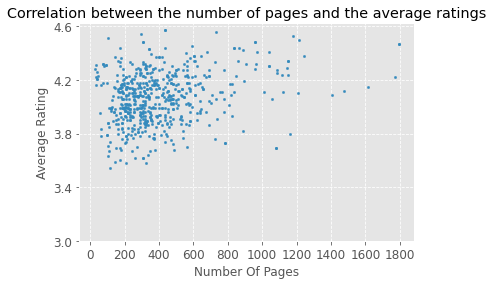

In [308]:
df.plot.scatter(x="num_pages",y="avg_rating", s=5)
plt.title("Correlation between the number of pages and the average ratings")
plt.xlabel("Number Of Pages")
plt.ylabel("Average Rating")
plt.xticks(np.arange(0, 2000, step=200), fontsize=12)
plt.yticks(np.arange(3, 5, step=0.4), fontsize=12)
plt.grid(linestyle="dashed")
plt.show()

This scatter plot tells us that there is no correlation between the number of pages and the number of ratings. In order to prove this numerically, we must work out the corelation coefficient, this is done by working out the covariance

Text(0.5, 1.0, 'Avg Rating distribution')

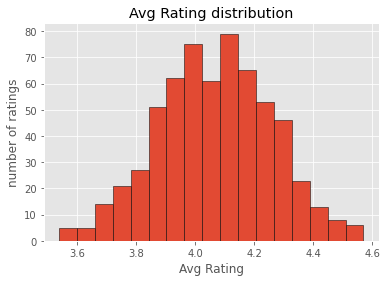

In [335]:
df["avg_rating"].hist(bins="auto", ec="black")
plt.style.use("ggplot")
plt.xlabel("Avg Rating")
plt.ylabel("number of ratings")
plt.title("Avg Rating distribution")

In [314]:

group_labels = ["mean norm rating", "min-max norm rating"]
fig= ff.create_distplot([df["minmax_norm_rating"], df["avg_rating_mean_norm"]], group_labels, bin_size=0.25)
fig.update_layout(
    title={
        "text":"min-max and mean norm ratings",
        'y':0.9,
        'x':0.4,
        "xanchor": "center",
        "yanchor":"top"},
     xaxis_title="normalized ratings", yaxis_title="frequency density", legend_title="Labels",
    font=dict(
        family="Courier New, monospace",
        size=18
    ))
fig.show()

# Question 4 , 5 , 6: Murtaza

### Basic Visualisation: will not be using it our presentation

(array([  0.,  10.,  25.,  69., 125., 129., 124.,  94.,  25.,  11.,   2.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 <BarContainer object of 19 artists>)

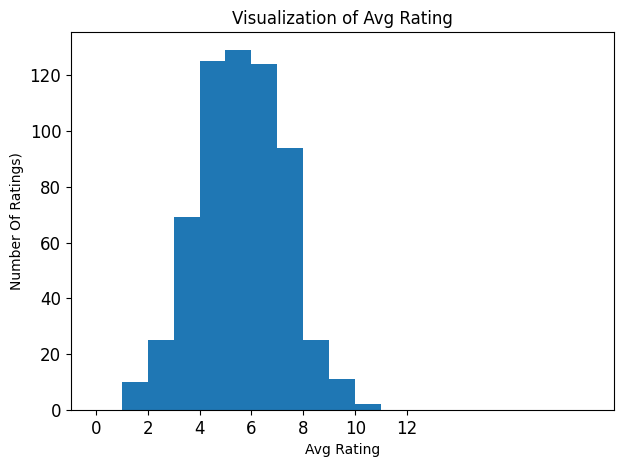

In [82]:
plt.title("Visualization of Avg Rating")
plt.xlabel("Avg Rating")
plt.ylabel("Number Of Ratings")
plt.xticks(np.arange(0, 14, step=2), fontsize=12)
plt.yticks(np.arange(0, 150, step=20), fontsize=12)
plt.hist(df['new_rating'], bins=range(20))


## Representation of Min max and Average ratin

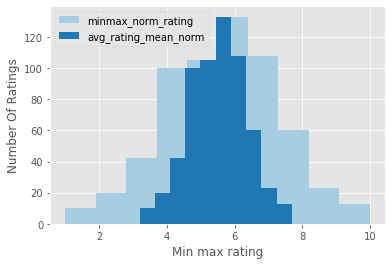

In [279]:
df['minmax_norm_rating'].plot(kind ='hist', bins =10)
df['avg_rating_mean_norm'].plot(kind ='hist', bins =10)
plt.legend()
plt.ylabel("Number Of Ratings")
plt.xlabel("Min max rating")
plt.show()

/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



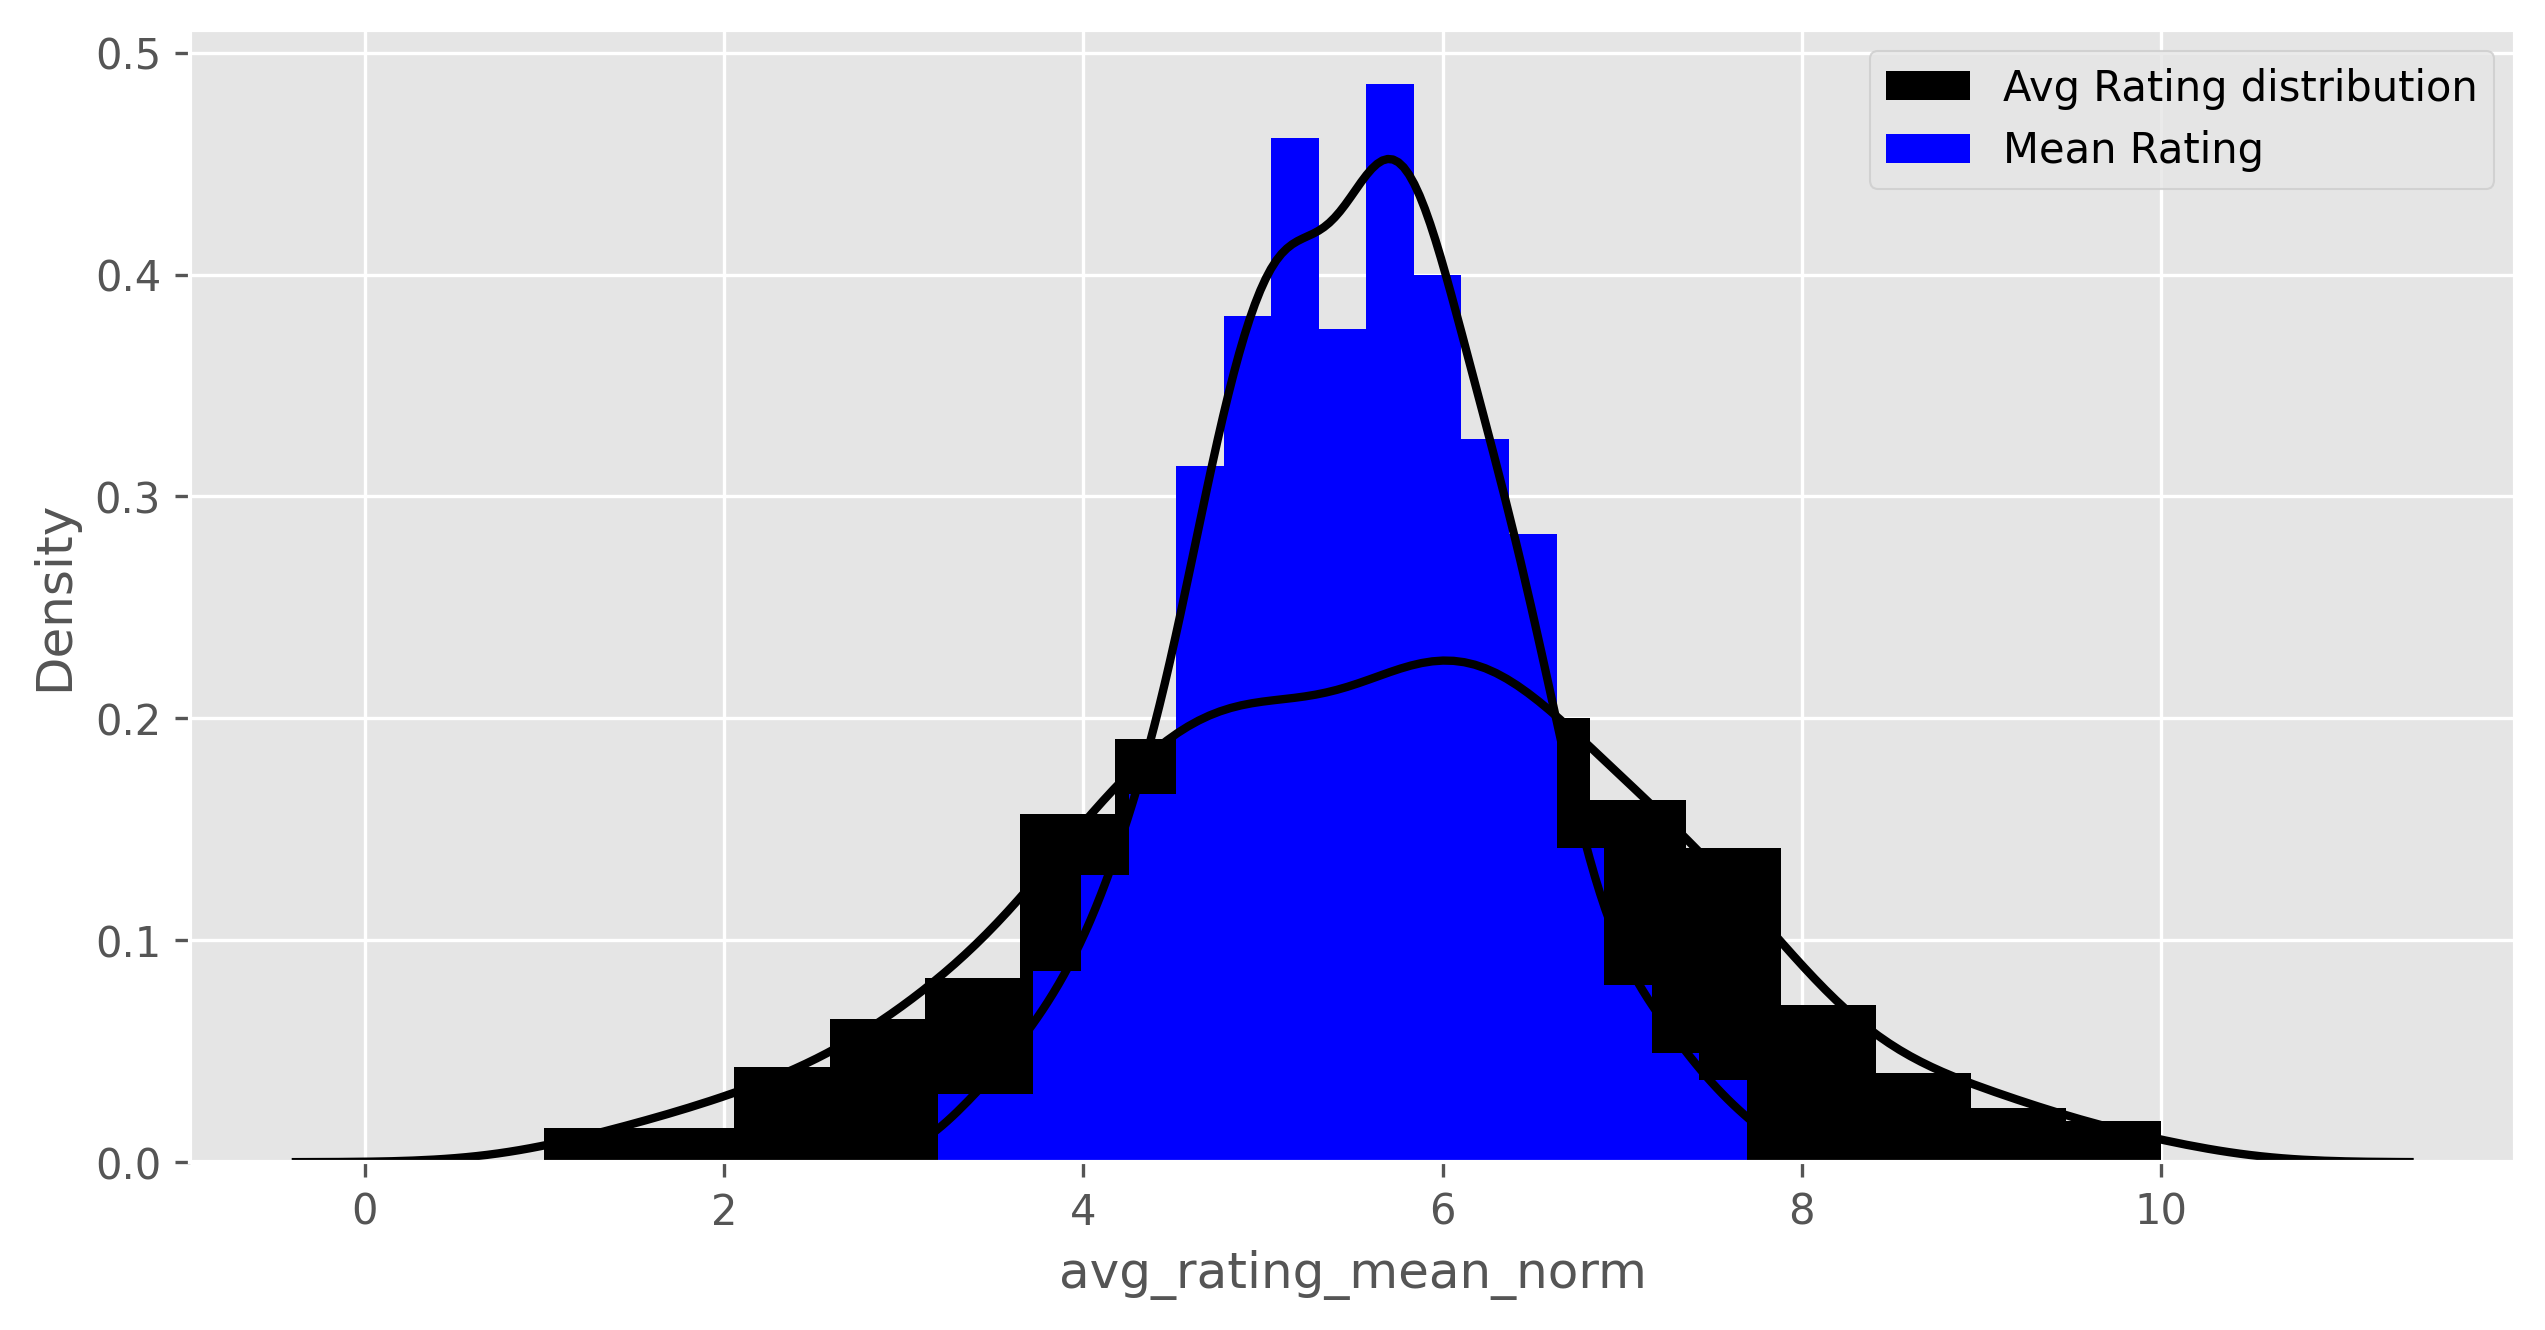

In [277]:
m1 = df['minmax_norm_rating']
m2 = df ['avg_rating_mean_norm']
m3 = df ['awards_count']
kwargs = dict(hist_kws={'alpha':1}, kde_kws={'color':'black','linewidth':2})
plt.figure(figsize=(10,5), dpi= 300)
sns.distplot(m1, color="black", label="Avg Rating distribution", **kwargs)
sns.distplot(m2, color="blue", label="Mean Rating", **kwargs)
# sns.distplot(m3, color="deeppink", label="Awards count", **kwargs)
plt.legend()
plt.show()


(array([[ 10.,  20.,  42., 100., 105., 133., 108.,  60.,  23.,  13.],
        [  0.,   0.,  10.,  73., 210., 234.,  76.,  11.,   0.,   0.]]),
 array([ 1. ,  1.9,  2.8,  3.7,  4.6,  5.5,  6.4,  7.3,  8.2,  9.1, 10. ]),
 <a list of 2 BarContainer objects>)

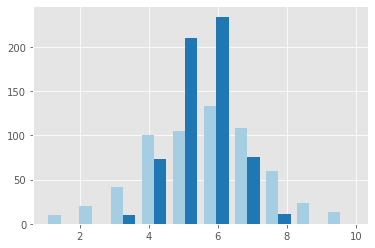

In [274]:
plt.hist([l1, l2])

## Question 8 Michael

<AxesSubplot:>

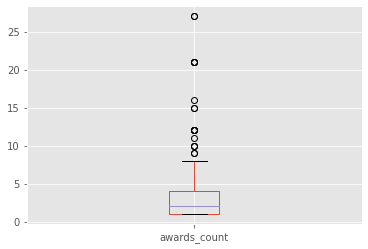

In [191]:
#Visualize the awards distribution in a boxplot and aggregated bars.
#Decide which of these representations gives us more information and in which cases they should be used.

df.boxplot(["awards_count"])

Text(0.5, 1.0, 'Awards count distribution')

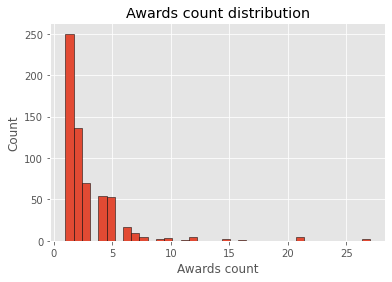

In [316]:
df["awards_count"].hist(bins="auto", ec="black")
plt.style.use("ggplot")
plt.xlabel("Awards count")
plt.ylabel("Count")
plt.title("Awards count distribution")

# questions 9&amp;10

<AxesSubplot:xlabel='original_publish_year', ylabel='avg_rating'>

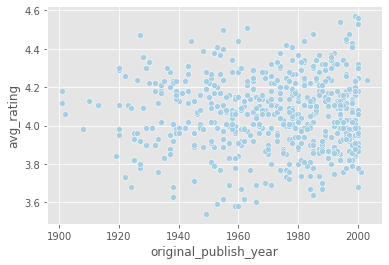

In [271]:
#9.simple plot to visualise the ratings w.r.t. the years

sns.scatterplot(data=df, x="original_publish_year", y="avg_rating", legend=False, sizes=(20, 2000))


/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='awards_count', ylabel='minmax_norm_rating'>

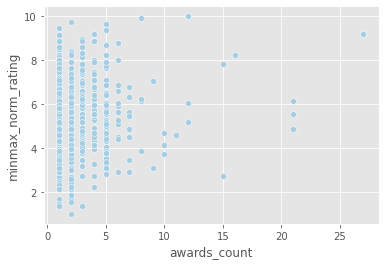

In [219]:
#10.scatterplot to represent  minmax_norm_ratings in function of the number of awards
#won by the book
# - Is there another representation that displays this in a more clear manner?
# - Optional: Can you plot a best fit linear regression line to represent the relationship?

sns.scatterplot(df['awards_count'], df['minmax_norm_rating'])

/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='awards_count', ylabel='minmax_norm_rating'>

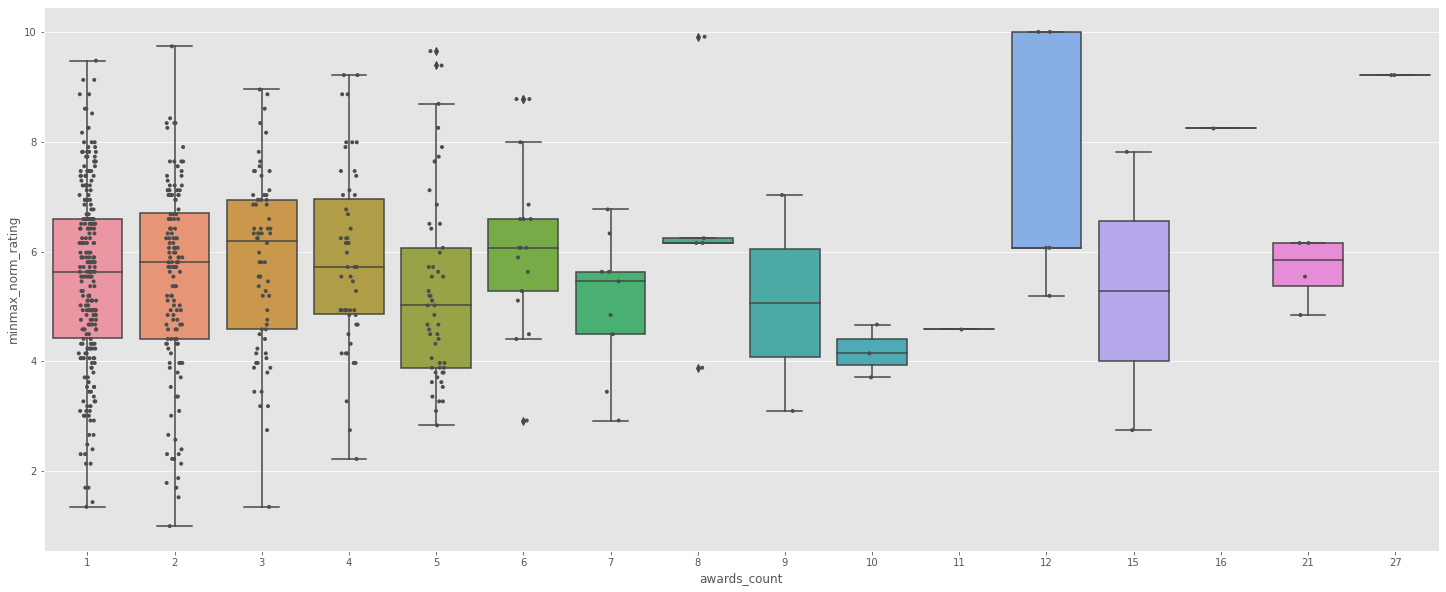

In [284]:
# nobs = df['awards_count'].value_counts().values
# nobs = [str(x) for x in nobs.tolist()]
# nobs = ["n: " + i for i in nobs] 
# pos = range(len(nobs))
# for tick,label in zip(pos,ax.get_yticklabels()):
#     ax.text(medians[tick],tick,nobs[tick],color='black', verticalalignment = "bottom")



plt.figure(figsize=(25,10))
sns.boxplot(df['awards_count'], df['minmax_norm_rating'])
sns.stripplot(df['awards_count'], df['minmax_norm_rating'], size=4, color=".3", linewidth=0)

/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='minmax_norm_rating', ylabel='awards_count'>

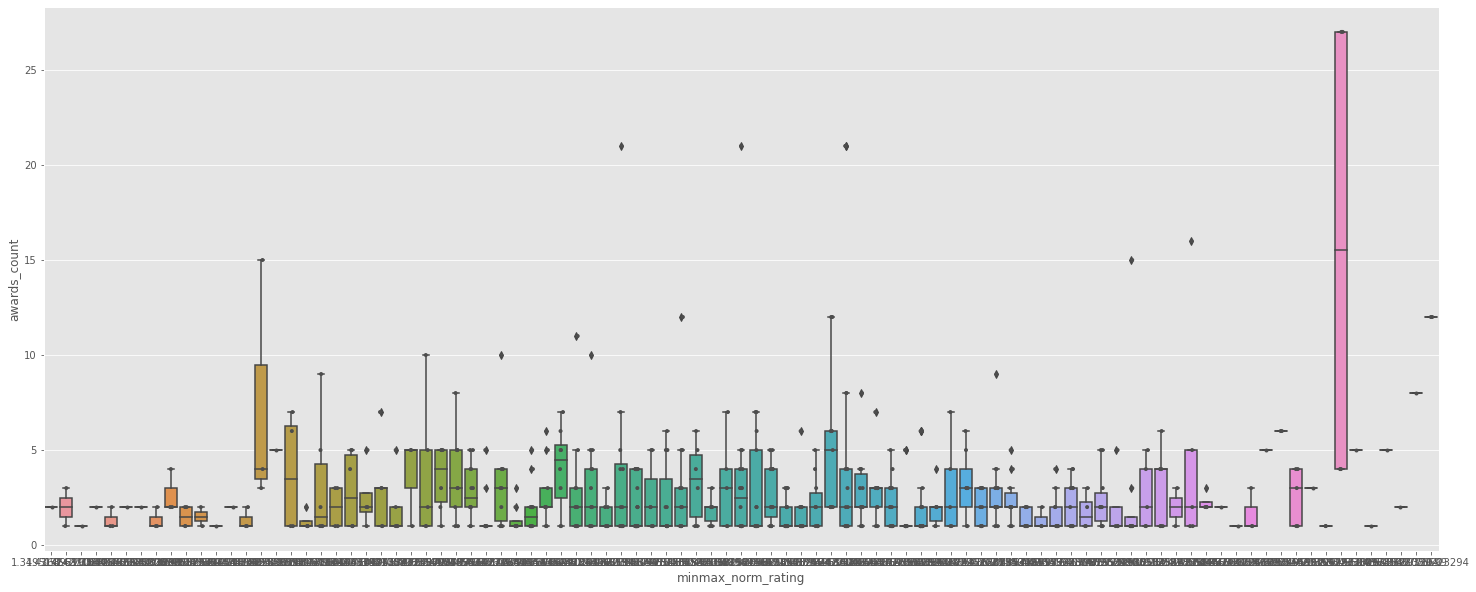

In [337]:
plt.figure(figsize=(25,10))
sns.boxplot(df['minmax_norm_rating'], df['awards_count'] )
sns.stripplot(df['minmax_norm_rating'],df['awards_count'], size=4, color=".3", linewidth=0)

/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='awards_count', ylabel='minmax_norm_rating'>

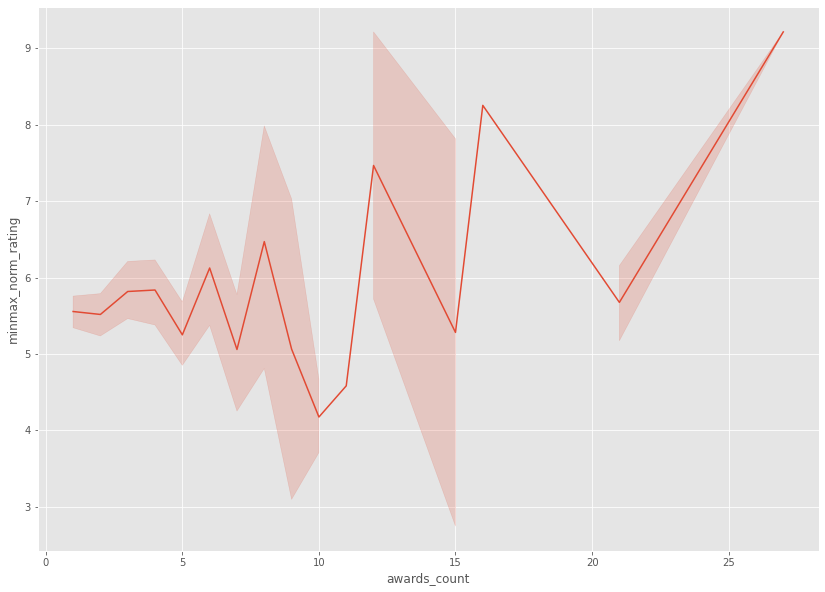

In [333]:
plt.figure(figsize=(14,10))
sns.lineplot(df['awards_count'], df['minmax_norm_rating'])

<Figure size 1440x1080 with 0 Axes>

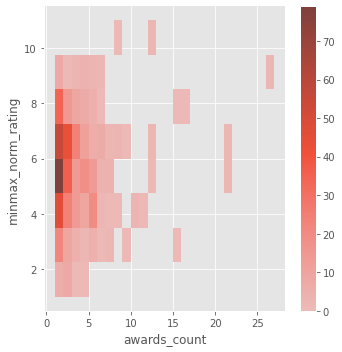

In [338]:
plt.figure(figsize=(20,15))
sns.displot(df, x="awards_count", y="minmax_norm_rating", binwidth=(1, 1.25), cbar=True)

## Question 11: Rajat

What is the probability that a book that is part of a series has won an award?
<br>To recall the formula: P(A|B) = P(B|A).P(A)/P(B)<br>
P(won an award | part of series) = P(part of series | won an award ). P(won an award)/P(part of series)

In [76]:
df.columns

Index(['Unnamed: 0', 'url', 'title', 'author', 'num_reviews', 'num_ratings',
       'avg_rating', 'num_pages', 'original_publish_year', 'series', 'genres',
       'awards', 'places', 'awards_count', 'new_rating', 'minmax_norm_rating',
       'avg_rating_mean_norm', 'awards_numeric'],
      dtype='object')

In [200]:
df[df['series']].shape[0]

236

In [197]:
df['awards_count'].isnull().sum()

0

P(awards) = 1, therefore, P(awards | series) = 1

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=ea77beab-a0d0-4c78-9888-3fa264f1f591' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>